In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['Category'] = le.fit_transform(df['Category'])

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
df.duplicated().sum()

415

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

Data Exploration

In [13]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [15]:
# data is imbalanced

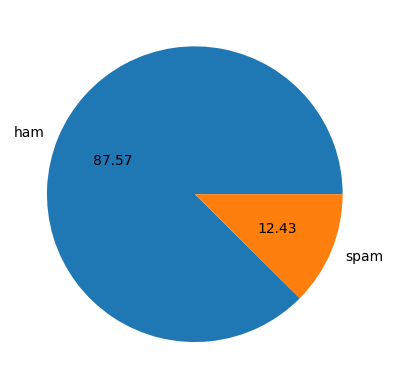

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

Data Preprocessing

In [17]:
import re
from bs4 import BeautifulSoup

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

In [18]:
def text_preprocessing(col):
    # Lower case
    col = col.str.lower()
    
    # Removing HTML tags
    col = col.apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())

    # Stemming
    col = col.apply(lambda x: ' '.join(stemmer.stem(word) for word in str(x).split()))

    # Removing stopwords and words with length=1
    col = col.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words and len(word) > 1))
    
    # Removing special characters and numbers
    col = col.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    
    # Removing extra spaces
    col = col.apply(lambda x: re.sub(r'\s+', ' ', x).strip()) 

    return col

In [19]:
print(text_preprocessing(df['Message']))

C:\Users\Lenovo pc\AppData\Local\Temp\ipykernel_8112\879467498.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  col = col.apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


0       go jurong point crazy avail onli bugi great wo...
1                                     ok lar joke wif oni
2       free entri wkli comp win fa cup final tkts 21s...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri contact u 750 pound prize claim e...
5568                                  go esplanad fr home
5569                     pity mood that soani suggestions
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: Message, Length: 5157, dtype: object


In [20]:
df['Message_pre'] = text_preprocessing(df['Message'])

C:\Users\Lenovo pc\AppData\Local\Temp\ipykernel_8112\879467498.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  col = col.apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())


In [21]:
df.head()

,Category,Message,Message_pre
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy avail onli bugi great wo...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,0,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [22]:
X = df['Message_pre']
y = df['Category']

Model Building

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assuming X_train and X_test are your training and testing text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [25]:
from sklearn.metrics import accuracy_score, precision_score

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [27]:
svc = SVC(kernel='sigmoid', gamma=1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [28]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'BNB':bnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [29]:

def train_classifier(clf,X_train_vectorized,y_train,X_test_vectorized,y_test):
    clf.fit(X_train_vectorized,y_train)
    y_pred = clf.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [30]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train_vectorized,y_train,X_test_vectorized,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9825581395348837
Precision -  0.990990990990991
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9602713178294574
Precision -  1.0
For  BNB
Accuracy -  0.9709302325581395
Precision -  0.98989898989899
For  DT
Accuracy -  0.9292635658914729
Precision -  0.875
For  LR
Accuracy -  0.9563953488372093
Precision -  0.9361702127659575
For  RF
Accuracy -  0.9689922480620154
Precision -  1.0


C:\Users\Lenovo pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9651162790697675
Precision -  0.8888888888888888
For  BgC
Accuracy -  0.9496124031007752
Precision -  0.8947368421052632
For  ETC
Accuracy -  0.9738372093023255
Precision -  0.9901960784313726
For  GBDT
Accuracy -  0.9496124031007752
Precision -  0.9310344827586207
For  xgb
Accuracy -  0.9680232558139535
Precision -  0.9607843137254902


In [31]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.960271,1.000000
6,RF,0.968992,1.000000
0,SVC,0.982558,0.990991
9,ETC,0.973837,0.990196
3,BNB,0.970930,0.989899
11,xgb,0.968023,0.960784
5,LR,0.956395,0.936170
10,GBDT,0.949612,0.931034
8,BgC,0.949612,0.894737


In [32]:
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)

voting_clf = VotingClassifier(estimators=[
    ('bnb', bnb),
    ('nb', mnb),
    ('rf', rfc),
    ('etc', etc),
    ('svc', svc)
], voting='soft')

voting_clf.fit(X_train_vectorized, y_train)

voting_preds = voting_clf.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, voting_preds)
precision = precision_score(y_test, voting_preds)
print("Voting Accuracy:", accuracy, "Voting Precision:", precision)

Voting Accuracy: 0.9738372093023255 Voting Precision: 1.0


In [33]:
from sklearn.ensemble import StackingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)

stacking_clf = StackingClassifier(estimators=[
    ('bnb', bnb),
    ('nb', mnb),
    ('rf', rfc),
    ('etc', etc),
    ('svc', svc)
], final_estimator=RandomForestClassifier())

stacking_clf.fit(X_train_vectorized, y_train)

stacking_preds = stacking_clf.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, stacking_preds)
precision = precision_score(y_test, stacking_preds)
print("Stacking Accuracy:", accuracy, "Stacking Precision:", precision)

Stacking Accuracy: 0.9932170542635659 Stacking Precision: 0.9918032786885246
